## Spectral Graph blah related to Fourier Transforms
##### jp lewis

- Fourier transform:  represent, process signal in terms of *sin, cos basis fuctions* 
(equivalently, complex exponential via $\exp(i x) = \cos(x) + i \sin(x)$.
- Spectral graph theory: represent, process graph using *eigenvectors of the graph Laplacian*.  E.g. implement convolution on meshes.

- $\color{red}{\text{How are these related?}}$


### Why Fourier transform for convolution
- $O(N \log N)$ vs $O(N^2)$ in 1D
- "Diagonalization". Fourier basis diagonalizes circulant matrices (more below)

$$
   y = C x  = (F \Lambda F^T) x = F \, \Lambda \, (F^T x)
$$

Fourier transform: represent signal as $f(t) = \int_{-\infty}^{\infty} F(\omega) \, \exp(2 \pi i \omega t) \, d\omega$

Or discrete form $f[t]= \sum_{w=0}^n F[w].r*cos(2\pi*w*t) + F[w].i*sin(2\pi*w*t)$

(mixed notation, x,t normalized)

cos, sin are an orthogonal basis. C.f. cartesian coordinates

![fourierbasis](laplacespectrum1d.png "fourier basis functions...")

### $\color{red}{\text{$\sin,\cos$ are the eigenvectors of the laplacian in 1D}}$

mnemonic for eigenvector

- Laplacian (2D, etc):  $\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$

- Laplacian in 1D: $\color{red}{\text{the second derivative.}}$

### Demonstration

- Approximate second derivative with finite difference 
$$
   f''(x) \approx \frac{ f(x+h) - 2 f(x) + f(x-h) }{h^2}
$$

- Choose $h=1$ for convenience. It won't affect the eigenvector calculation.

- represent as an inner product with a (1,-2,1) "stencil":  $(1,-2,1) \cdot (f[x+1], f[x], f[x-1])$

Encode all the second derivatives in a single "operator" matrix, Toeplitz like
(note this does not render online in nbviewer.org, but looks correct on local Jupyter)
$$ L f  \propto
   \left[
    \begin{array}{cccccc}
	 -1 & 1  &     &   &   &		\\
	 1  & -2 & 1   &    &  &		\\
	    &  1 & -2  & 1  &   & 		\\
	   &    & 1   & -2 & 1\cdots &		\\
	    &   &     & 1  & -2  &  1		\\
	    &    &    & \cdots  &  &  	\\
    \end{array} 
  \right]
  \left[ \begin{array}{c} f[1] \\ f[2] \\ f[3] \\ \vdots \end{array} \right]
$$
- Detail: strictly, sin,cos are eigenvectors of *circulant* matrix. If matrix is large, relatively small difference from Toeplitz.



In [1]:
import sys
import numpy as n_
import scipy.sparse as sparse
import scipy.sparse.linalg as sl
import matplotlib.pyplot as p_

### make the 2nd finiite difference aka graph laplacian matrix

In [2]:
# make the matrix
N = 50
A = sparse.lil_matrix((N,N))
A.setdiag(2.*n_.ones(N))
A.setdiag(-1.*n_.ones(N),1)
A.setdiag(-1.*n_.ones(N),-1)
# make it circulant so eigenvectors will be perfect
if True:
    A[0,-1] = -1.
    A[N-1,0] = -1.
A = A * 0.5

### calculate eigenvalues L, eigenvectors U

In [3]:
# calculate eigenvalues L, eigenvectors U
# weird, eigsh says it cannot calculate all eigenvalues
#L, U = sl.eigsh(A)
#print(n_.sort(L))
AD = A.todense()   # lazy to figure out, use dense instead
L, U = n_.linalg.eigh(AD)
print(L.shape, U.shape)
print(L)
#print(n_.sort(L))

(50,) (50, 50)
[0.00 0.01 0.01 0.03 0.03 0.07 0.07 0.12 0.12 0.19 0.19 0.27 0.27 0.36 0.36
 0.46 0.46 0.57 0.57 0.69 0.69 0.81 0.81 0.94 0.94 1.06 1.06 1.19 1.19 1.31
 1.31 1.43 1.43 1.54 1.54 1.64 1.64 1.73 1.73 1.81 1.81 1.88 1.88 1.93 1.93
 1.97 1.97 1.99 1.99 2.00]


### plot

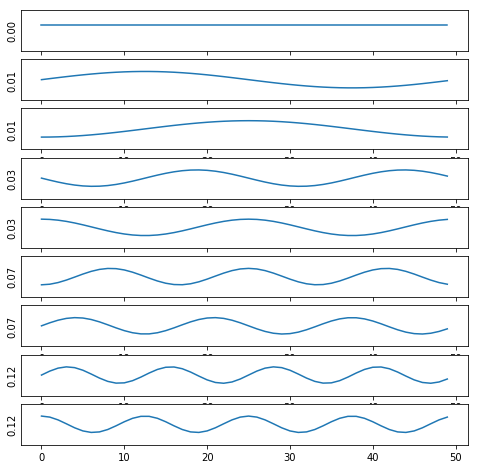

In [4]:
Subplotoff = 1
Npx = 1
Npy = 9
def nextplot(L,U,ie):
    global Subplotoff
    #plt = frame.add_subplot(Npy,Npx,Subplotoff)
    plt = p_.subplot(Npy,Npx,Subplotoff)
    plt.axes.get_yaxis().set_ticks([])
    plt.axes.set_ylim(-0.5,0.5)
    plt.plot(U[:,ie])
    plt.axes.set_ylabel('%.2f' % L[ie])
    Subplotoff = Subplotoff + 1

frame = p_.figure()
frame.set_size_inches(8,8)
for ie in range(9):
    nextplot(L,U,ie)
p_.show()

### Fourier-like operations on meshes:

### Graph Laplacian
- $A$: symmetric "adjacency" matrix, e.g. $A_{ij}=1$ if edge, else 0.
- $D$: diagonal "degree" matrix, row sum of $A$, counts vertex degree.
- $L = D - A$


- symmetric, so eigenvectors are an orthogonal basis
- first eigenvalue is zero (c.f. constant of integration)

### chladni - eigs of biharmonic

biharmonic:  $L^2$

![chladni - biharmonic (Gander/Wanner)](FourierSpectralMeshFigs/chladni_ganderWanner.png "Chaldni - eigs of biharmonic")

Gander/Wanner

### caricature (boost mid freqs e.g.)
![boost mid or low freqs](FourierSpectralMeshFigs/eigdinocaricature.png "caricature")

### horse harmonics
![horse harmonics](FourierSpectralMeshFigs/eigHorses.png "harmonics")

### fourier approximation
![fourier approximation](FourierSpectralMeshFigs/eigHorseShape3.png "approx")
![fourier approximation](FourierSpectralMeshFigs/eigHorseShapes2.png "approx")

### why Laplacian
- The manifold laplacian is "intrinsic", and is the simplest thing that requires (is determined by) a metric.  
- The first derivative can be made to vanish at any particular point by a change of coordinates. Manifold laplacian does not depend on coordinates
- Manifold laplacian != graph laplacian BUT graph laplacian proved to converge to manifold laplacian with particular choice of adjacency

### Other applications

- spectral embedding, isometric matching
